In [1]:
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision.io import read_image
import torchvision.transforms.functional as F

In [2]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.io import read_image
weights=ResNet50_Weights.IMAGENET1K_V1
model = resnet50(weights=weights)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
def normalize(img_1):
    img_1 = (img_1 - torch.min(img_1))/(torch.max(img_1)-torch.min(img_1))
    return img_1

In [4]:
m = nn.LogSoftmax(dim=1)
def class_model_visualization(img,label,learning_rate,epochs):
    beta = torch.tensor([0.001])
    loss = nn.CrossEntropyLoss()
    img = torch.nn.Parameter(img.clone())
    optimizer = torch.optim.Adam([img], lr=learning_rate,betas=(0.99, 0.99), eps=1e-08, weight_decay=0)
    for i in range(epochs):
        output = model(img).softmax(1)
        loss_value = loss(output,label)
        loss_value = loss_value - beta*torch.norm(img)
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()
    print(loss_value)
    return normalize(img)

tensor([2.4602], grad_fn=<SubBackward0>)


Text(0.5, 1.0, 'siberain husky')

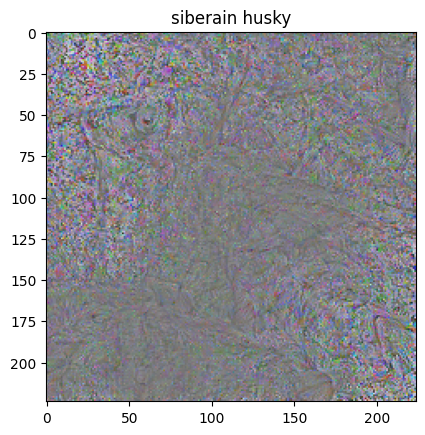

In [10]:
img = torch.randn((1, 3, 224, 224), requires_grad=True)
img = normalize(img)
final_img_1 = class_model_visualization(img,torch.tensor([250]),0.05,950)
plt.imshow(final_img_1.detach().squeeze().permute(1,2,0))
plt.title('siberain husky')

tensor([0.8224], grad_fn=<SubBackward0>)


Text(0.5, 1.0, 'flamingo')

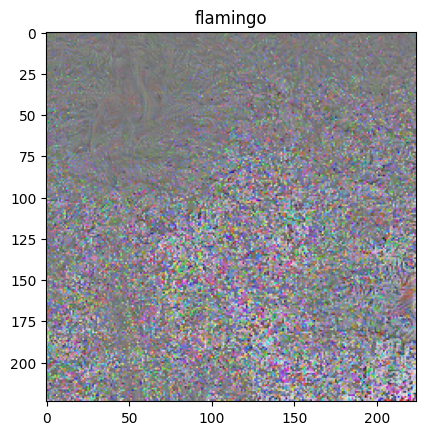

In [6]:
final_img_2 = class_model_visualization(img,torch.tensor([130]),0.05,900)
plt.imshow(final_img_2.detach().squeeze().permute(1,2,0))
plt.title('flamingo')

tensor([0.9510], grad_fn=<SubBackward0>)


Text(0.5, 1.0, 'dumbell')

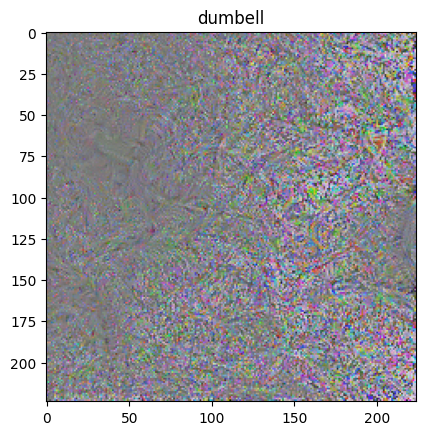

In [7]:
final_img_3 = class_model_visualization(img,torch.tensor([543]),0.05,950)
plt.imshow(final_img_3.detach().squeeze().permute(1,2,0))
plt.title('dumbell')